In [ ]:
import pandas as pd

df = pd.read_csv("data/sales_data.csv")
df.head()


In [2]:
import pandas as pd

df = pd.read_csv("data/sales_data.csv")
df.head()


,Date,Advertising,Sales,Region
0,2024-01-01,1000,12000,West
1,2024-02-01,1500,15000,East
2,2024-03-01,1300,14000,West
3,2024-04-01,1600,17000,South
4,2024-05-01,1700,18000,North


In [3]:
import matplotlib.pyplot as plt

# Example visualization (adjust column names if needed)
df.groupby("region")["sales"].sum().plot(kind="bar")

plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


KeyError: 'region'

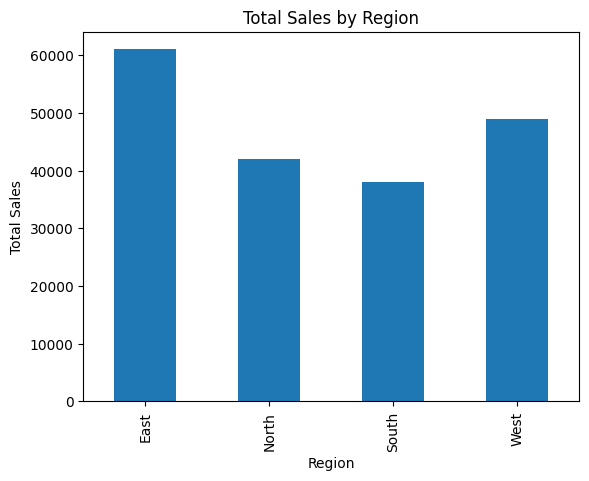

In [4]:
import matplotlib.pyplot as plt

# Use the exact column names from your CSV
df.groupby("Region")["Sales"].sum().plot(kind="bar")

plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


In [5]:
# Detect missing values
df.isnull().sum()


Date           0
Advertising    0
Sales          0
Region         0
dtype: int64

In [6]:
# Calculate IQR for Sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[(df['Sales'] >= Q1 - 1.5*IQR) & (df['Sales'] <= Q3 + 1.5*IQR)]

# Display results
df_no_outliers


,Date,Advertising,Sales,Region
0,2024-01-01,1000,12000,West
1,2024-02-01,1500,15000,East
2,2024-03-01,1300,14000,West
3,2024-04-01,1600,17000,South
4,2024-05-01,1700,18000,North
5,2024-06-01,1800,20000,East
6,2024-07-01,1900,21000,South
7,2024-08-01,2000,23000,West
8,2024-09-01,2100,24000,North
9,2024-10-01,2200,26000,East


In [7]:
# Example: drop Date column if not needed
df_reduced = df_no_outliers.drop(columns=['Date'])

# Or sample 50% of data if dataset is big
df_sample = df_reduced.sample(frac=0.5, random_state=1)

df_reduced.head()


,Advertising,Sales,Region
0,1000,12000,West
1,1500,15000,East
2,1300,14000,West
3,1600,17000,South
4,1700,18000,North


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df_reduced.copy()
df_scaled[['Sales', 'Advertising']] = scaler.fit_transform(df_scaled[['Sales', 'Advertising']])
df_scaled.head()


,Advertising,Sales,Region
0,0.000000,0.000000,West
1,0.416667,0.214286,East
2,0.250000,0.142857,West
3,0.500000,0.357143,South
4,0.583333,0.428571,North


In [9]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Date         10 non-null     str  
 1   Advertising  10 non-null     int64
 2   Sales        10 non-null     int64
 3   Region       10 non-null     str  
dtypes: int64(2), str(2)
memory usage: 452.0 bytes


,Advertising,Sales
count,10.000000,10.000000
mean,1710.000000,19000.000000
std,372.528895,4594.682917
min,1000.000000,12000.000000
25%,1525.000000,15500.000000
50%,1750.000000,19000.000000
75%,1975.000000,22500.000000
max,2200.000000,26000.000000


In [10]:
print("Min:", df['Sales'].min())
print("Max:", df['Sales'].max())
print("Mean:", df['Sales'].mean())
print("Median:", df['Sales'].median())
print("Mode:", df['Sales'].mode()[0])


Min: 12000
Max: 26000
Mean: 19000.0
Median: 19000.0
Mode: 12000


In [11]:
print("Range:", df['Sales'].max() - df['Sales'].min())
print("Quartiles:\n", df['Sales'].quantile([0.25,0.5,0.75]))
print("IQR:", Q3-Q1)
print("Variance:", df['Sales'].var())
print("Std Dev:", df['Sales'].std())


Range: 14000
Quartiles:
 0.25    15500.0
0.50    19000.0
0.75    22500.0
Name: Sales, dtype: float64
IQR: 7000.0
Variance: 21111111.111111112
Std Dev: 4594.682917363408


In [12]:
df.corr()


ValueError: could not convert string to float: '2024-01-01'